In [1]:
from Functions import Estimation_dsbm
from Functions.functions import *

import warnings
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time

from sklearn.metrics.cluster import normalized_mutual_info_score

import pandas as pd

In [2]:
warnings.simplefilter('ignore')

# Faculty hiring networks (Comp. Sci., Business, History)

https://networks.skewed.de/net/faculty_hiring

In [3]:
nodes_faculty_df = pd.read_csv('Dataset/faculty_nodes.csv')
edges_faculty_df = pd.read_csv('Dataset/faculty_edges.csv')

nodes_faculty_df.head()

,# index,name,pi,USN2010,NRC95,Region,institution,_pos
0,0,1,2.23,1,1,West,Stanford University,"array([-7.59363812, 5.82120879])"
1,1,2,2.31,1,3,West,UC Berkeley,"array([-7.56257198, 5.79237204])"
2,2,3,3.52,1,2,Northeast,MIT,"array([-7.5708025 , 5.80711383])"
3,3,5,6.12,17,11,Northeast,Harvard University,"array([-7.61994034, 5.81027949])"
4,4,6,8.29,5,5,Northeast,Cornell University,"array([-7.57951676, 5.79117444])"


In [4]:
#'# source', ' target'
nodes_faculty_df2 = nodes_faculty_df.drop(nodes_faculty_df.index[-1])
edges_faculty_df2 = edges_faculty_df[(edges_faculty_df['# source'] != 205) & (edges_faculty_df[' target'] != 205)]

In [5]:
nodes_faculty_df2[' institution']

0                 Stanford University
1                         UC Berkeley
2                                 MIT
3                  Harvard University
4                  Cornell University
                    ...              
200       University of Idaho, Moscow
201         University of Mississippi
202    University of Colorado, Denver
203            University of Manitoba
204       University of New Brunswick
Name:  institution, Length: 205, dtype: object

In [6]:
top_institutions = ['Stanford University', 'UC Berkeley', 'MIT', 'California Institute of Technology',
                    'Harvard University', 'Cornell University', 'Carnegie Mellon University', 'Princeton University',
                    'Yale University', 'University of Washington','University of Illinois, Urbana Champaign',
                    'University of Wisconsin, Madison', 'University of Pennsylvania', 'Rice University', 'UCLA',
                   'New York University', 'University of Chicago', 'University of Texas, Austin',
                   'Brown University', 'Columbia University', 'University of Toronto', 'University of Rochester',
                   'University of Southern California', 'Johns Hopkins University', 'University of Massachusetts, Amherst',
                   'UC San Diego', 'University of Maryland, College Park', 'University of Michigan', 
                    'University of North Carolina, Chapel Hill', 'Duke University']

len(top_institutions)

30

In [7]:
nodes_faculty_df2['label'] = nodes_faculty_df2[' institution'].apply(lambda x: 1 if x in top_institutions else 0)
top_uni = nodes_faculty_df2['label'].tolist()
sum(top_uni)

30

# Directed Network

In [8]:
# Create the graph
G_faculty = nx.DiGraph() # directed

# Add nodes with attributes from the nodes DataFrame
import ast

# Convert string representation of list into a list by stripping 'array(...)'
nodes_faculty_df2[' _pos'] = nodes_faculty_df2[' _pos'].apply(lambda x: ast.literal_eval(x.replace('array', '').strip('()')))

# Now loop through the rows and create nodes
for _, row in nodes_faculty_df2.iterrows():
    node_id = row['# index']
    pos = row[' _pos']  # Now pos is a list of coordinates
    
    G_faculty.add_node(node_id, pos=pos)

# Add edges from the edges DataFrame
for _, row in edges_faculty_df2.iterrows():
    source = row['# source']
    target = row[' target']
    
    # Add the edge between source and target
    G_faculty.add_edge(source, target)
    
# G_faculty = G_faculty.to_undirected()

In [9]:
# G_faculty2 = nx.from_numpy_array(adj_matrix)
print("The number of nodes: {}".format(len(G_faculty.nodes)))
print("Number of edges: {}".format(G_faculty.number_of_edges()))
print("Density of the graph: {}".format(np.round(nx.density(G_faculty), 4)))

The number of nodes: 205
Number of edges: 2881
Density of the graph: 0.0689


In [10]:
A = nx.to_numpy_array(G_faculty)
print(A)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]]


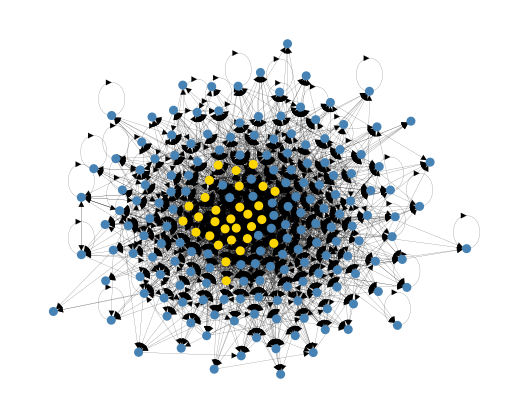

In [11]:
color_map = {0: '#4682B4', 1: '#FFD700'}

nodes_faculty_df2['colors'] = nodes_faculty_df2['label'].map(color_map)
paper_colors = nodes_faculty_df2['colors'].tolist()

# Use the predefined positions directly
pos = {row['# index']: row[' _pos'] for _, row in nodes_faculty_df2.iterrows()}

# Draw the graph with different colors for each cluster
plt.figure(figsize=(5, 4))
nx.draw(G_faculty, pos = pos, with_labels=False, node_size=30, font_size=8, node_color=paper_colors, edge_color='black', width=0.1)

# Show the plot
plt.show()

In [12]:
print(nx.is_directed(G_faculty))  # Should print: True

True


In [13]:
from matplotlib.colors import ListedColormap

# Define a colormap with unique colours for each cluster
colormap_heatmap = ListedColormap([
    '#2A1B6F',  # Dark Purple
    '#4D328E',  # Purple
    '#7556B9',  # Light Purple
    '#9D83E4',  # Lavender
    '#C0A9F0',  # Pale Lavender
    '#E0C8F4',  # Light Purple-Blue
    '#F5E5F9',  # Very Light Lavender
    '#F9F0FF',  # Lightest Purple
    '#F9F4FF',  # Almost White with a Tint
    '#F3D9A7',  # Pale Yellow
    '#F0C260',  # Yellow-Green
    '#E8A137',  # Golden Yellow
    '#D17F1B',  # Orange-Yellow
    '#BB5614',  # Orange
    '#A74A0D',  # Reddish Orange
    '#9A4007',  # Dark Orange
    '#873303',  # Burnt Orange
    '#6C2602',  # Dark Brown-Red
    '#5C1D00'   # Very Dark Red
])

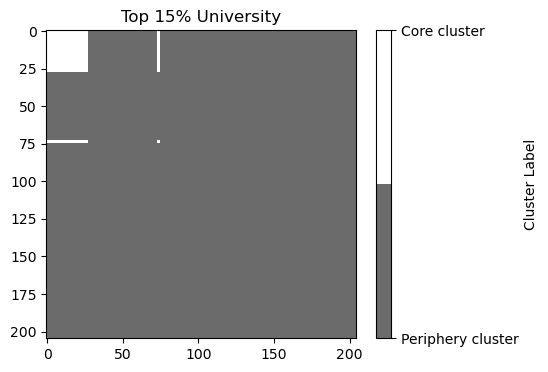

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

N = 205

label_matrix = np.zeros((N, N), dtype=int)
for i in range(N):
    for j in range(N):
        if top_uni[i] == top_uni[j]:
            label_matrix[i, j] = top_uni[i]

color_1 = "#FFFFFF"   # different cluster
color_0 = "#6B6B6B"   # same cluster

binary_cmap = ListedColormap([color_0, color_1])

plt.figure(figsize=(5,4))
plt.imshow(label_matrix > 0, cmap=binary_cmap, aspect='auto')

cbar = plt.colorbar(ticks=[0, 1])
cbar.set_ticklabels(["Periphery cluster", "Core cluster"])
cbar.set_label("Cluster Label")

plt.title("Top 15% University")
plt.show()

In [15]:
# Get the adjacency matrix
A = nx.to_numpy_array(G_faculty)

# Set diagonal entries to 0
np.fill_diagonal(A, 0)

# Output the modified adjacency matrix
print(A)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


# Undirected Network

In [16]:
#'# source', ' target'
nodes_faculty_df2 = nodes_faculty_df.drop(nodes_faculty_df.index[-1])
edges_faculty_df2 = edges_faculty_df[(edges_faculty_df['# source'] != 205) & (edges_faculty_df[' target'] != 205)]

In [17]:
# Create the graph
G_faculty2 = nx.Graph() # undirected

# Add nodes with attributes from the nodes DataFrame
import ast

# Convert string representation of list into a list by stripping 'array(...)'
nodes_faculty_df2[' _pos'] = nodes_faculty_df2[' _pos'].apply(lambda x: ast.literal_eval(x.replace('array', '').strip('()')))

# Now loop through the rows and create nodes
for _, row in nodes_faculty_df2.iterrows():
    node_id = row['# index']
    pos = row[' _pos']  # Now pos is a list of coordinates
    
    G_faculty2.add_node(node_id, pos=pos)

# Add edges from the edges DataFrame
for _, row in edges_faculty_df2.iterrows():
    source = row['# source']
    target = row[' target']
    
    # Add the edge between source and target
    G_faculty2.add_edge(source, target)

In [18]:
# G_faculty2 = nx.from_numpy_array(adj_matrix)
print("The number of nodes: {}".format(len(G_faculty2.nodes)))
print("Number of edges: {}".format(G_faculty2.number_of_edges()))
print("Density of the graph: {}".format(np.round(nx.density(G_faculty2), 4)))

The number of nodes: 205
Number of edges: 2693
Density of the graph: 0.1288


In [19]:
# Remove self-loops
G_faculty.remove_edges_from(nx.selfloop_edges(G_faculty2))
print(nx.is_directed(G_faculty2))  # Should print: False

False


In [20]:
# Get the adjacency matrix
A2 = nx.to_numpy_array(G_faculty2)

# Set diagonal entries to 0
np.fill_diagonal(A2, 0)

# Output the modified adjacency matrix
print(A2)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


# NMI

## Directed

In [21]:
k=2; d=2
i=10
direction=True
method='K-Means'

pipeline = Estimation_dsbm.ClusteringPipeline(A)
ase_kmeans = pipeline.gen_ASE(case='ASE1', k=k, d=d, rs=i, direction = direction, method=method)
score_ase_kmeans = normalized_mutual_info_score(ase_kmeans, top_uni)

dase_kmeans = pipeline.gen_ASE(case='Atilde', k=k, d=d, rs=i, direction = direction, method=method)
score_dase_kmeans = normalized_mutual_info_score(dase_kmeans, top_uni)

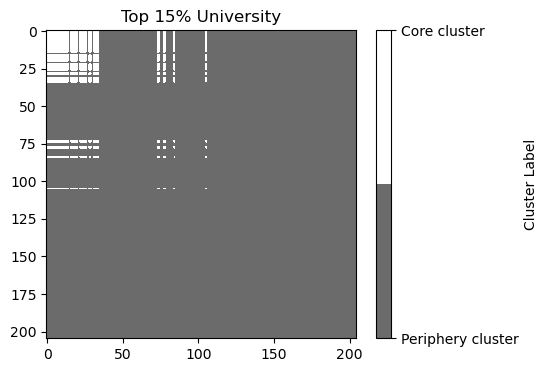

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

N = 205

# Create an NxN matrix where each entry represents the cluster label
label_matrix = np.zeros((N, N), dtype=int)

label = ase_kmeans

# Assign cluster values to sub-blocks in the matrix
for i in range(N):
    for j in range(N):
        if label[i] == label[j]:  # Same cluster -> same value
            if label[i] == 1:
                label_matrix[i, j] = 1
            else:
                label_matrix[i, j] = 0

color_1 = "#FFFFFF"   # different cluster
color_0 = "#6B6B6B"   # same cluster

binary_cmap = ListedColormap([color_0, color_1])

plt.figure(figsize=(5,4))
plt.imshow(label_matrix > 0, cmap=binary_cmap, aspect='auto')

cbar = plt.colorbar(ticks=[0, 1])
cbar.set_ticklabels(["Periphery cluster", "Core cluster"])
cbar.set_label("Cluster Label")

plt.title("Top 15% University")
plt.show()

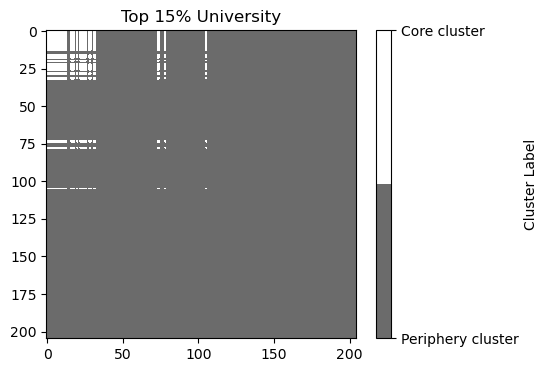

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

N = 205

# Create an NxN matrix where each entry represents the cluster label
label_matrix = np.zeros((N, N), dtype=int)

label = dase_kmeans

# Assign cluster values to sub-blocks in the matrix
for i in range(N):
    for j in range(N):
        if label[i] == label[j]:  # Same cluster -> same value
            if label[i] == 1:
                label_matrix[i, j] = 1
            else:
                label_matrix[i, j] = 0

color_1 = "#FFFFFF"   # different cluster
color_0 = "#6B6B6B"   # same cluster

binary_cmap = ListedColormap([color_0, color_1])

plt.figure(figsize=(5,4))
plt.imshow(label_matrix > 0, cmap=binary_cmap, aspect='auto')

cbar = plt.colorbar(ticks=[0, 1])
cbar.set_ticklabels(["Periphery cluster", "Core cluster"])
cbar.set_label("Cluster Label")

plt.title("Top 15% University")
plt.show()

In [24]:
def score_function(A, k, d, rs, direction, method, ground_truth):

    score_sc = []
    score_ase = []
    score_dase = []

    for i in range(rs):

        pipeline = Estimation_dsbm.ClusteringPipeline(A)
        ase = pipeline.gen_ASE(case='ASE1', k=k, d=d, rs=i, direction = direction, method=method)
        score_ase.append(normalized_mutual_info_score(ase, ground_truth))
        
        dase = pipeline.gen_ASE(case='Atilde', k=k, d=d, rs=i, direction = direction, method=method)
        score_dase.append(normalized_mutual_info_score(dase, ground_truth))


    NMI_ase = np.mean(score_ase)
    NMI_dase = np.mean(score_dase)

    std_ase = np.std(score_ase)
    std_dase = np.std(score_dase)


    return (
        NMI_ase, NMI_dase,
        std_ase, std_dase
    )

In [25]:
# K-Means

k=2; d=2
direction=True
method = 'K-Means'

results = score_function(A, k, d, 50, direction, method, top_uni)

# Unpack results
( 
    NMI_ase_kmeans_k2, NMI_dase_kmeans_k2,

    std_ase_kmeans_k2, std_dase_kmeans_k2
    
) = results

In [26]:
# GMM

k=2; d=2
direction=True
method = 'GMM'

results = score_function(A, k, d, 50, direction, method, top_uni)

# Unpack results
( 
    NMI_ase_gmm_k2, NMI_dase_gmm_k2,

    std_ase_gmm_k2, std_dase_gmm_k2
    
) = results

In [27]:
data = {
    "Metric": ["ASE", "DASE"],
    "K-Means (k=2)": [
        f"{NMI_ase_kmeans_k2:.4f} ({std_ase_kmeans_k2:.2f})",
        f"{NMI_dase_kmeans_k2:.4f} ({std_dase_kmeans_k2:.2f})"
    ],
    "GMM (k=2)": [
        f"{NMI_ase_gmm_k2:.4f} ({std_ase_gmm_k2:.2f})",
        f"{NMI_dase_gmm_k2:.4f} ({std_dase_gmm_k2:.2f})"
    ]
}

df = pd.DataFrame(data)
df

,Metric,K-Means (k=2),GMM (k=2)
0,ASE,0.5348 (0.00),0.3588 (0.00)
1,DASE,0.5371 (0.02),0.3013 (0.00)


## Undirected

In [28]:
k=2; d=2
i=10
direction=False
method='K-Means'

pipeline = Estimation_dsbm.ClusteringPipeline(A2)
ase2_kmeans = pipeline.gen_ASE(case='ASE1', k=k, d=d, rs=i, direction = direction, method=method)
score_ase2_kmeans = normalized_mutual_info_score(ase2_kmeans, top_uni)

dase2_kmeans = pipeline.gen_ASE(case='Atilde', k=k, d=d, rs=i, direction = direction, method=method)
score_dase2_kmeans = normalized_mutual_info_score(dase2_kmeans, top_uni)

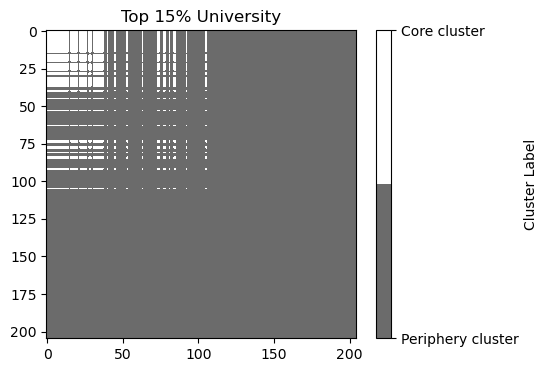

In [29]:
N = 205

# Create an NxN matrix where each entry represents the cluster label
label_matrix = np.zeros((N, N), dtype=int)

label = ase2_kmeans

# Assign cluster values to sub-blocks in the matrix
for i in range(N):
    for j in range(N):
        if label[i] == label[j]:  # Same cluster -> same value
            if label[i] == 1:
                label_matrix[i, j] = 1
            else:
                label_matrix[i, j] = 0

color_1 = "#FFFFFF"   # different cluster
color_0 = "#6B6B6B"   # same cluster

binary_cmap = ListedColormap([color_0, color_1])

plt.figure(figsize=(5,4))
plt.imshow(label_matrix > 0, cmap=binary_cmap, aspect='auto')

cbar = plt.colorbar(ticks=[0, 1])
cbar.set_ticklabels(["Periphery cluster", "Core cluster"])
cbar.set_label("Cluster Label")

plt.title("Top 15% University")
plt.show()

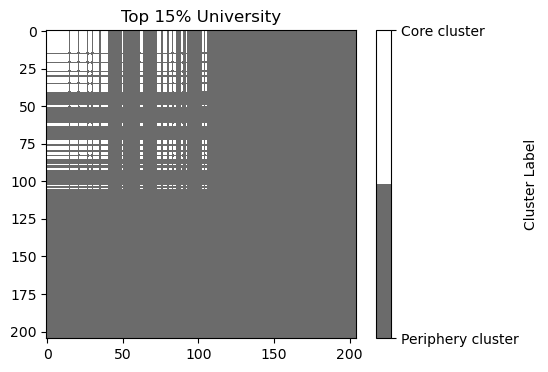

In [30]:
N = 205

# Create an NxN matrix where each entry represents the cluster label
label_matrix = np.zeros((N, N), dtype=int)

label = dase2_kmeans

# Assign cluster values to sub-blocks in the matrix
for i in range(N):
    for j in range(N):
        if label[i] == label[j]:  # Same cluster -> same value
            if label[i] == 1:
                label_matrix[i, j] = 1
            else:
                label_matrix[i, j] = 0

color_1 = "#FFFFFF"   # different cluster
color_0 = "#6B6B6B"   # same cluster

binary_cmap = ListedColormap([color_0, color_1])

plt.figure(figsize=(5,4))
plt.imshow(label_matrix > 0, cmap=binary_cmap, aspect='auto')

cbar = plt.colorbar(ticks=[0, 1])
cbar.set_ticklabels(["Periphery cluster", "Core cluster"])
cbar.set_label("Cluster Label")

plt.title("Top 15% University")
plt.show()

In [31]:
# K-Means

k=2; d=2
direction=False
method = 'K-Means'

results2 = score_function(A2, k, d, 50, direction, method, top_uni)

# Unpack results
( 
    NMI_ase_kmeans_k2, NMI_dase_kmeans_k2,

    std_ase_kmeans_k2, std_dase_kmeans_k2
    
) = results2

# GMM

method = 'GMM'

results2 = score_function(A2, k, d, 50, direction, method, top_uni)

# Unpack results
( 
    NMI_ase_gmm_k2, NMI_dase_gmm_k2,

    std_ase_gmm_k2, std_dase_gmm_k2
    
) = results2

In [32]:
data = {
    "Metric": ["ASE", "DASE"],
    "K-Means (k=2)": [
        f"{NMI_ase_kmeans_k2:.4f} ({std_ase_kmeans_k2:.2f})",
        f"{NMI_dase_kmeans_k2:.4f} ({std_dase_kmeans_k2:.2f})"
    ],
    "GMM (k=2)": [
        f"{NMI_ase_gmm_k2:.4f} ({std_ase_gmm_k2:.2f})",
        f"{NMI_dase_gmm_k2:.4f} ({std_dase_gmm_k2:.2f})"
    ]
}

df = pd.DataFrame(data)
df

,Metric,K-Means (k=2),GMM (k=2)
0,ASE,0.2799 (0.16),0.1651 (0.09)
1,DASE,0.3345 (0.00),0.2113 (0.00)


In [33]:
# Directed
(sc_label_k10, sc_time_k10), (ase_label_k10, ase_time_k10), (dase_label_k10, dase_time_k10) = compute_accuracy(G_faculty, 10, 10, 10, True, 'K-Means')

NameError: name 'compute_accuracy' is not defined

In [ ]:
from matplotlib.colors import ListedColormap

N = 205

# Create an NxN matrix where each entry represents the cluster label
label_matrix = np.zeros((N, N), dtype=int)

label = sc_label_k10

# Assign cluster values to sub-blocks in the matrix
for i in range(N):
    for j in range(N):
        if label[i] == label[j]:  # Same cluster -> same value
            if label[i] == 3:
                label_matrix[i, j] = 1
            else:
                label_matrix[i, j] = 0

# Plot the heatmap
plt.figure(figsize=(5, 4))
plt.imshow(label_matrix, cmap=colormap_heatmap, aspect='auto')

# Add a colorbar with cluster labels
cbar = plt.colorbar(ticks=np.unique(label))
cbar.set_label('Cluster Label')
cbar.set_ticklabels([f'Cluster {i}' for i in np.unique(label)])

# plt.title("DASE")
plt.show()

In [ ]:
sc_label_k10_9 = (sc_label_k10 == 9).astype(int)
print(normalized_mutual_info_score(sc_label_k10_9, top_uni))

sc_label_k10_8 = (sc_label_k10 == 8).astype(int)
print(normalized_mutual_info_score(sc_label_k10_8, top_uni))

sc_label_k10_7 = (sc_label_k10 == 7).astype(int)
print(normalized_mutual_info_score(sc_label_k10_7, top_uni))

sc_label_k10_6 = (sc_label_k10 == 6).astype(int)
print(normalized_mutual_info_score(sc_label_k10_6, top_uni))

sc_label_k10_5 = (sc_label_k10 == 5).astype(int)
print(normalized_mutual_info_score(sc_label_k10_5, top_uni))

sc_label_k10_4 = (sc_label_k10 == 4).astype(int)
print(normalized_mutual_info_score(sc_label_k10_4, top_uni))

sc_label_k10_3 = (sc_label_k10 == 3).astype(int)
print(normalized_mutual_info_score(sc_label_k10_3, top_uni))

sc_label_k10_2 = (sc_label_k10 == 2).astype(int)
print(normalized_mutual_info_score(sc_label_k10_2, top_uni))

sc_label_k10_1 = (sc_label_k10 == 1).astype(int)
print(normalized_mutual_info_score(sc_label_k10_1, top_uni))

In [ ]:
ase_label_k10_9 = (ase_label_k10 == 9).astype(int)
print(normalized_mutual_info_score(ase_label_k10_9, top_uni))

ase_label_k10_8 = (ase_label_k10 == 8).astype(int)
print(normalized_mutual_info_score(ase_label_k10_8, top_uni))

ase_label_k10_7 = (ase_label_k10 == 7).astype(int)
print(normalized_mutual_info_score(ase_label_k10_7, top_uni))

ase_label_k10_6 = (ase_label_k10 == 6).astype(int)
print(normalized_mutual_info_score(ase_label_k10_6, top_uni))

ase_label_k10_5 = (ase_label_k10 == 5).astype(int)
print(normalized_mutual_info_score(ase_label_k10_5, top_uni))

ase_label_k10_4 = (ase_label_k10 == 4).astype(int)
print(normalized_mutual_info_score(ase_label_k10_4, top_uni))

ase_label_k10_3 = (ase_label_k10 == 3).astype(int)
print(normalized_mutual_info_score(ase_label_k10_3, top_uni))

ase_label_k10_2 = (ase_label_k10 == 2).astype(int)
print(normalized_mutual_info_score(ase_label_k10_2, top_uni))

ase_label_k10_1 = (ase_label_k10 == 1).astype(int)
print(normalized_mutual_info_score(ase_label_k10_1, top_uni))

In [ ]:
dase_label_k10_9 = (dase_label_k10 == 9).astype(int)
print(normalized_mutual_info_score(dase_label_k10_9, top_uni))

dase_label_k10_8 = (dase_label_k10 == 8).astype(int)
print(normalized_mutual_info_score(dase_label_k10_8, top_uni))

dase_label_k10_7 = (dase_label_k10 == 7).astype(int)
print(normalized_mutual_info_score(dase_label_k10_7, top_uni))

dase_label_k10_6 = (dase_label_k10 == 6).astype(int)
print(normalized_mutual_info_score(dase_label_k10_6, top_uni))

dase_label_k10_5 = (dase_label_k10 == 5).astype(int)
print(normalized_mutual_info_score(dase_label_k10_5, top_uni))

dase_label_k10_4 = (dase_label_k10 == 4).astype(int)
print(normalized_mutual_info_score(dase_label_k10_4, top_uni))

dase_label_k10_3 = (dase_label_k10 == 3).astype(int)
print(normalized_mutual_info_score(dase_label_k10_3, top_uni))

dase_label_k10_2 = (dase_label_k10 == 2).astype(int)
print(normalized_mutual_info_score(dase_label_k10_2, top_uni))

dase_label_k10_1 = (dase_label_k10 == 1).astype(int)
print(normalized_mutual_info_score(dase_label_k10_1, top_uni))

In [ ]:
a = [1,1,1,0,0,0]
b = [1,1,2,2,3,3]
c = [1,2,3,1,2,3]
d = [5,5,5,0,0,0]

ab = normalized_mutual_info_score(a,b)
ac = normalized_mutual_info_score(a,c)

print(ab)
print(ac)

In [ ]:
# K-Means

A = adj_matrix

k=10; d=10
direction=True
method = 'K-Means'

results = score_function(A, k, d, 50, direction, method, top_uni)

# Unpack results
( 
    NMI_ase_kmeans_k10, NMI_dase_kmeans_k10, NMI_cocite_kmeans_k10, 
    NMI_b_c_kmeans_k10, NMI_b_s_kmeans_k10, NMI_degree_kmeans_k10,

    std_ase_kmeans_k10, std_dase_kmeans_k10, std_cocite_kmeans_k10,
    std_b_c_kmeans_k10, std_b_s_kmeans_k10, std_degree_kmeans_k10
    
) = results

In [ ]:
# GMM

A = adj_matrix

k=10; d=10
direction=True
method = 'GMM'

results = score_function(A, k, d, 50, direction, method, top_uni)

# Unpack results
( 
    NMI_ase_gmm_k10, NMI_dase_gmm_k10, NMI_cocite_gmm_k10, 
    NMI_b_c_gmm_k10, NMI_b_s_gmm_k10, NMI_degree_gmm_k10,

    std_ase_gmm_k10, std_dase_gmm_k10, std_cocite_gmm_k10,
    std_b_c_gmm_k10, std_b_s_gmm_k10, std_degree_gmm_k10
    
) = results

In [ ]:
data = {
    "Metric": ["ASE", "DASE", "Co-Cite", "B_Coupling", "B_Sym", "Degree"],
    "K-Means (k=10)": [
        f"{NMI_ase_kmeans_k10:.4f} ({std_ase_kmeans_k10:.2f})",
        f"{NMI_dase_kmeans_k10:.4f} ({std_dase_kmeans_k10:.2f})",
        f"{NMI_cocite_kmeans_k10:.4f} ({std_cocite_kmeans_k10:.2f})",
        f"{NMI_b_c_kmeans_k10:.4f} ({std_b_c_kmeans_k10:.2f})",
        f"{NMI_b_s_kmeans_k10:.4f} ({std_b_s_kmeans_k10:.2f})",
        f"{NMI_degree_kmeans_k10:.4f} ({std_degree_kmeans_k10:.2f})"
    ],
    "GMM (k=10)": [
        f"{NMI_ase_gmm_k10:.4f} ({std_ase_gmm_k10:.2f})",
        f"{NMI_dase_gmm_k10:.4f} ({std_dase_gmm_k10:.2f})",
        f"{NMI_cocite_gmm_k10:.4f} ({std_cocite_gmm_k10:.2f})",
        f"{NMI_b_c_gmm_k10:.4f} ({std_b_c_gmm_k10:.2f})",
        f"{NMI_b_s_gmm_k10:.4f} ({std_b_s_gmm_k10:.2f})",
        f"{NMI_degree_gmm_k10:.4f} ({std_degree_gmm_k10:.2f})"
    ]
}

df = pd.DataFrame(data)
df
# print(df.to_string(index=False))

In [ ]:
# Directed
(sc_label_k10, sc_time_k10), (ase_label_k10, ase_time_k10), (dase_label_k10, dase_time_k10) = compute_accuracy(G_faculty, 10, 10, 10, True)

# Undirected
# (sc_label, sc_time), (ase_label, ase_time), (dase_label, dase_time) = compute_accuracy(G_faculty, 4, 4, 4, False)

In [ ]:
# K-Means

A = adj_matrix

k=10; d=10
direction=True
method = 'K-Means'

pipeline_ase = Estimation_dsbm.ClusteringPipeline(A)
ase_kmeans_k10 = pipeline_ase.gen_ASE(case='ASE1', k=k, d=d, rs=0, direction = direction, method=method)

pipeline_dase = Estimation_dsbm.ClusteringPipeline(A)
dase_kmeans_k10 = pipeline_dase.gen_ASE(case='Atilde', k=k, d=d, rs=0, direction = direction, method=method)

In [ ]:
# GMM

A = adj_matrix

k=10; d=10
direction=True
method = 'GMM'

pipeline_ase = Estimation_dsbm.ClusteringPipeline(A)
ase_gmm_k10 = pipeline_ase.gen_ASE(case='ASE1', k=k, d=d, rs=0, direction = direction, method=method)

pipeline_dase = Estimation_dsbm.ClusteringPipeline(A)
dase_gmm_k10 = pipeline_dase.gen_ASE(case='Atilde', k=k, d=d, rs=0, direction = direction, method=method)

In [ ]:
top_uni_result = group_by_labels(top_uni)
for label, nodes in top_uni_result.items():
    print(f"{label}: {nodes[:10]}")  # Show first 10 nodes per group to avoid clutter

In [ ]:
top_uni_core_label = top_uni_result[1]
top_uni_core_label[:10]

In [ ]:
clustering_result = group_by_labels(ase_label_k10)
plot_group_histogram(clustering_result, top_uni_core_label)

### NMI

In [ ]:
# k_list = [4, 7, 10, 13]
# k_list = [3, 7, 11, 15]
# k_list = [3, 7, 10]
k_list = [2, 10]

label_list = ['SC', 'ASE', 'DASE']
NMI_dict = {}
index_dict = {}
pred_dict = {}

for k in k_list:
    print("K: {}".format(k))
    (sc_label, sc_time), (ase_label, ase_time), (dase_label, dase_time) = compute_accuracy(G_faculty, k, k, k, True)
    l_list = [sc_label, ase_label, dase_label]
    
    print("")
    
    for i in range(len(label_list)):
        
        print(label_list[i])
        clustering_result = group_by_labels(l_list[i])

        true_label = top_uni
        pred_result = clustering_result
        NMI, max_index = NMI_max(pred_result, true_label)

        
        NMI_dict.setdefault(label_list[i], []).append(max(NMI))
        index_dict.setdefault(label_list[i], []).append(max_index)

        indices = clustering_result[max_index]
        pred = indicator_vector(len(true_label), indices)
        
        pred_dict.setdefault(label_list[i], []).append(pred)
        
    print("")

In [ ]:
df_NMI = pd.DataFrame(NMI_dict)
df_NMI.insert(0, 'Number of Clusters', ["K = {}".format(k) for k in k_list])  
np.round(df_NMI, 4)

In [ ]:
true_label = top_uni

print("k=2")
print("K-Means")
nmi_ase_k2 = normalized_mutual_info_score(true_label, ase_kmeans_k2)
nmi_dase_k2 = normalized_mutual_info_score(true_label, dase_kmeans_k2)
print("NMI (ASE): {}".format(np.round(nmi_ase_k2,4)))
print("NMI (DASE): {}".format(np.round(nmi_dase_k2,4)))

In [ ]:
print("GMM")
nmi_ase_k2 = normalized_mutual_info_score(true_label, ase_gmm_k2)
nmi_dase_k2 = normalized_mutual_info_score(true_label, dase_gmm_k2)
print("NMI (ASE): {}".format(np.round(nmi_ase_k2,4)))
print("NMI (DASE): {}".format(np.round(nmi_dase_k2,4)))

In [ ]:
true_label = top_uni

print("k=10")
print("K-Means")
nmi_ase_k10 = normalized_mutual_info_score(true_label, ase_kmeans_k10)
nmi_dase_k10 = normalized_mutual_info_score(true_label, dase_kmeans_k10)
print("NMI (ASE): {}".format(np.round(nmi_ase_k10,4)))
print("NMI (DASE): {}".format(np.round(nmi_dase_k10,4)))

In [ ]:
print("GMM")
nmi_ase_k10 = normalized_mutual_info_score(true_label, ase_gmm_k10)
nmi_dase_k10 = normalized_mutual_info_score(true_label, dase_gmm_k10)
print("NMI (ASE): {}".format(np.round(nmi_ase_k10,4)))
print("NMI (DASE): {}".format(np.round(nmi_dase_k10,4)))

In [ ]:
# k_list = [4, 7, 10, 13]

label_list = ['SC', 'ASE', 'DASE']
time_dict = {}

iterations = 100

for k in k_list:
    
    sc_time_list = []
    ase_time_list = []
    dase_time_list = []
    
    for j in range(iterations):
    
        print("K: {}".format(k))
        (sc_label, sc_time), (ase_label, ase_time), (dase_label, dase_time) = compute_accuracy(G_faculty, k, k, k, True)
        
        sc_time_list.append(sc_time)
        ase_time_list.append(ase_time)
        dase_time_list.append(dase_time)
    
        print("")
    
    time_list = [np.mean(sc_time_list), np.mean(ase_time_list), np.mean(dase_time_list)]
    
    for i in range(len(label_list)):
        
        time_dict.setdefault(label_list[i], []).append(time_list[i])
        
    print("")

In [ ]:
df_time = pd.DataFrame(time_dict)
df_time.insert(0, 'Number of Clusters', ["K = {}".format(k) for k in k_list])  
np.round(df_time, 4)

In [ ]:
index_dict

In [ ]:
(sc_label, sc_time), (ase_label, ase_time), (dase_label, dase_time) = compute_accuracy(G_faculty, 3, 3, 3, True)

sc_result = group_by_labels(sc_label)
core_sc_k3 = indicator_vector(N, sc_result[2])

ase_result = group_by_labels(ase_label)
core_ase_k3 = indicator_vector(N, ase_result[2])

dase_result = group_by_labels(dase_label)
core_dase_k3 = indicator_vector(N, dase_result[1])

In [ ]:
(sc_label, sc_time), (ase_label, ase_time), (dase_label, dase_time) = compute_accuracy(G_faculty, 7, 7, 7, True)

sc_result = group_by_labels(sc_label)
core_sc_k7 = indicator_vector(N, sc_result[3])

ase_result = group_by_labels(ase_label)
core_ase_k7 = indicator_vector(N, ase_result[2])

dase_result = group_by_labels(dase_label)
core_dase_k7 = indicator_vector(N, dase_result[3])

In [ ]:
N = 205

(sc_label, sc_time), (ase_label, ase_time), (dase_label, dase_time) = compute_accuracy(G_faculty, 10, 10, 10, True)

sc_result = group_by_labels(sc_label)
core_sc_k10 = indicator_vector(N, sc_result[2])

ase_result = group_by_labels(ase_label)
core_ase_k10 = indicator_vector(N, ase_result[2])

dase_result = group_by_labels(dase_label)
core_dase_k10 = indicator_vector(N, dase_result[2])

In [ ]:
(sc_label, sc_time), (ase_label, ase_time), (dase_label, dase_time) = compute_accuracy(G_faculty, 11, 11, 11)

sc_result = group_by_labels(sc_label)
core_sc_k11 = indicator_vector(N, sc_result[2])

ase_result = group_by_labels(ase_label)
core_ase_k11 = indicator_vector(N, ase_result[0])

dase_result = group_by_labels(dase_label)
core_dase_k11 = indicator_vector(N, dase_result[1])

In [ ]:
(sc_label, sc_time), (ase_label, ase_time), (dase_label, dase_time) = compute_accuracy(G_faculty2, 13, 13, 13)

sc_result = group_by_labels(sc_label)
core_sc_k13 = indicator_vector(N, sc_result[9])

ase_result = group_by_labels(ase_label)
core_ase_k13 = indicator_vector(N, ase_result[12])

dase_result = group_by_labels(dase_label)
core_dase_k13 = indicator_vector(N, dase_result[11])

In [ ]:
# k_list = [4, 5, 7, 10, 13, 14]
# k_list = [4, 7, 10, 13]
# k_list = [4,5,6,7,8,9,10,11,12,13,14]

k_list = [10]

label_list = ['SC', 'ASE', 'DASE']
percentage_dict = {}
number_dict = {}
index_dict = {}

for k in k_list:
    print("K: {}".format(k))
    (sc_label, sc_time), (ase_label, ase_time), (dase_label, dase_time) = compute_accuracy(G_faculty, k, k, k, True)
    l_list = [sc_label, ase_label, dase_label]
    
    print("")
    
    for i in range(len(label_list)):
        
        print(label_list[i])
        clustering_result = group_by_labels(l_list[i])
        print(clustering_result)

        true_label = top_uni
        pred_result = clustering_result
        NMI, max_index = NMI_max(pred_result, true_label)

        index_dict.setdefault(label_list[i], []).append(max_index)

        indices = clustering_result[max_index]
        pred = indicator_vector(len(true_label), indices)
        num, per = compute_recovery_metrics(true_label, pred)
        percentage_dict.setdefault(label_list[i], []).append(per)
        number_dict.setdefault(label_list[i], []).append(num)
        
        
    print("")

In [ ]:
df_per = pd.DataFrame(percentage_dict)
# df_per.insert(0, 'Number of Clusters', ['K=4', 'K=5', 'K=7', 'K=10', 'K=13', 'K=14'])  
df_per.insert(0, 'Number of Clusters', ["K = {}".format(k) for k in k_list])  
np.round(df_per, 4)

In [ ]:
df_num = pd.DataFrame(number_dict)
# df_num.insert(0, 'Number of Clusters', ['K=4', 'K=5', 'K=7', 'K=10', 'K=13', 'K=14'])  
df_num.insert(0, 'Number of Clusters', ["K = {}".format(k) for k in k_list])  
np.round(df_num, 4)

In [ ]:
from sklearn.metrics import normalized_mutual_info_score

N = len(dase_label)
indices = clustering_result[9]
pred = indicator_vector(N, indices)

nmi_score = normalized_mutual_info_score(top_uni, pred)
f_score = f1_score(top_uni, pred)
print("NMI: {}".format(np.round(nmi_score, 4)))
print("F score: {}".format(np.round(f_score, 4)))

# Chernoff information

In [34]:
import numpy as np

def estimate_block_probs(A, labels, K, directed=False):
    """
    Estimate block probability matrix from adjacency matrix
    and return block sizes.

    Parameters
    ----------
    A : ndarray
        Adjacency matrix (n x n), binary {0,1}
    labels : ndarray
        Node labels (length n) indicating block membership, values in {0,...,K-1}
    K : int
        Number of blocks
    directed : bool
        Whether the graph is directed

    Returns
    -------
    P : ndarray (K x K)
        Estimated block probability matrix
    sizes : ndarray (K,)
        Number of nodes in each block
    """
    n = len(labels)
    P = np.zeros((K, K))
    sizes = np.zeros(K, dtype=int)

    for a in range(K):
        nodes_a = np.where(labels == a)[0]
        sizes[a] = len(nodes_a)
        for b in range(K):
            nodes_b = np.where(labels == b)[0]

            if len(nodes_a) == 0 or len(nodes_b) == 0:
                continue

            if a == b:
                # the number of edges within block a
                subA = A[np.ix_(nodes_a, nodes_a)]
                observed = subA.sum()
                if not directed:
                    observed = np.triu(subA, k=1).sum()  # upper triangle만 세기
                possible = len(nodes_a) * (len(nodes_a) - 1)
                if not directed:
                    possible //= 2
            else:
                observed = A[np.ix_(nodes_a, nodes_b)].sum()
                possible = len(nodes_a) * len(nodes_b)

            if possible > 0:
                P[a, b] = observed / possible

    return P, sizes

In [35]:
def compute_Q(Z, B):
    """Compute probability matrix Q = Z B Z^T"""
    return Z @ B @ Z.T

def compute_H(Q):
    """Compute expected value of AA: H = Q Q"""
    # return Q @ Q
    return Q @ Q/len(Q)

def estimate_B_hat(H, Z, K):
    """
    Estimate block matrix B_hat using matrix H and cluster indicator Z.
    Works for both label vectors (n,) and one-hot matrices (n, K).
    """
    Z = np.array(Z)
    
    # If Z is one-hot (n, K), convert it to label vector
    if Z.ndim == 2:
        labels = np.argmax(Z, axis=1)
    else:
        labels = Z

    B_hat = np.zeros((K, K))
    for i in range(K):
        for j in range(K):
            mask_i = (labels == i)
            mask_j = (labels == j)
            block = H[np.ix_(mask_i, mask_j)]
            if block.size > 0:
                B_hat[i, j] = np.mean(block)

    return B_hat

def compute_V(Q):
    N = Q.shape[0]
    V = np.zeros((N, N))
    for i in range(N):
        # q_vec for all j at once: q_vec[k,j] = Q[i,k] * Q[k,j]
        q_mat = Q[i, :, None] * Q  # (N,1)*(N,N) -> (N,N), rows=k, cols=j
        # sum over k
        V[i, :] = (q_mat * (1 - q_mat)).sum(axis=0) / (N**2)
    return V

def estimate_C_hat(V, Z, K):
    """
    Estimate blockwise variance C_hat from V.
    V: variance matrix (N x N)
    Z: node labels (N,) or one-hot (N x K)
    K: number of clusters
    Returns:
        C_hat of shape (K, K)
    """

    Z = np.array(Z)

    if Z.ndim == 2:
        labels = np.argmax(Z, axis=1)
    else:
        labels = Z

    C_hat = np.zeros((K, K))
    for i in range(K):
        for j in range(K):
            mask_i = (labels == i)
            mask_j = (labels == j)
            block = V[np.ix_(mask_i, mask_j)]
            if block.size > 0:
                C_hat[i, j] = np.mean(block)

    return C_hat


import numpy as np
from scipy.optimize import minimize_scalar

def Chernoff_information_size_adjusted(B, C, pi, K, eps=1e-9):
    chernoff = []
    I = np.eye(K)
    Pi = np.diag(pi)
    
    for k in range(K):
        for l in range(K):
            if k != l:
                e = (I[k] - I[l]).reshape(K, 1)

                def f(t):
                    if t <= 0 or t >= 1:
                        return -np.inf
                    S_kl = (1 - t) * np.diag(C[k,:]) + t * np.diag(C[l,:])
                    try:
                        val = float(e.T @ B @ Pi @ np.linalg.inv(S_kl) @ B @ e)
                    except np.linalg.LinAlgError:
                        return -np.inf
                    return 0.5 * t * (1 - t) * val

                res = minimize_scalar(lambda tt: -f(tt), bounds=(eps, 1-eps), method="bounded")
                sup_val = f(res.x)

#                 print(f"(k={k}, l={l}) sup at t={res.x:.4f} → {sup_val:.6f}")

                chernoff.append(sup_val)
    
    ci = [val for val in chernoff if val > 0]
    return min(ci)

def Chernoff_C_ASE(B):
    K = len(B)
    C = np.zeros((K, K))
    for i in range(K):
        for j in range(K):
            p = B[i,j]
            C[i,j] = p * (1-p)

    return C

In [36]:
def chernoff_information_results(A, k, d, rs, direction, method):
    
    score_ase = []
    score_dase = []

    progress_bar = tqdm(total=rs, desc="Processing")
    
    for i in range(rs):

        pipeline = Estimation_dsbm.ClusteringPipeline(A)

        # ASE
        ase = pipeline.gen_ASE(case='ASE1', k=k, d=d, rs=i, direction = direction, method=method)
        P_ase, sizes_ase = estimate_block_probs(A, ase, K=k, directed=direction)

        pi_ase = sizes_ase/np.sum(sizes_ase)
        
        B_ase = P_ase
        C_ase = Chernoff_C_ASE(B_ase)
        CI_ase = Chernoff_information_size_adjusted(B_ase, C_ase, pi_ase, k)
        score_ase.append(CI_ase)
        
        # DASE
        dase = pipeline.gen_ASE(case='Atilde', k=k, d=d, rs=i, direction = direction, method=method)
        P_dase, sizes_dase = estimate_block_probs(A, dase, K=k, directed=direction)

        pi_dase = sizes_dase/np.sum(sizes_dase)

        N = len(dase)
        Z = np.zeros((N, k), dtype=int)
        Z[np.arange(N), dase] = 1
        
        Q = compute_Q(Z, P_dase)
        H = compute_H(Q)
        B_dase = estimate_B_hat(H, dase, k)
        V = compute_V(Q)
        C_dase = estimate_C_hat(V, dase, k)
        
        CI_dase = Chernoff_information_size_adjusted(B_dase, C_dase, pi_dase, k)
        score_dase.append(CI_dase)

        progress_bar.update(1)
        
    progress_bar.close()
    print("Processing completed.")
    

    return (
    np.mean(score_ase), np.mean(score_dase),
    np.std(score_ase), np.std(score_dase)
)

#### K = 2

In [37]:
k, d = 2, 2
rs = 50
direction = False
method = 'K-Means'


results = chernoff_information_results(A2, k, d, rs, direction, method)

(
    CI_ase_kmeans_k2, CI_dase_kmeans_k2,

    CI_std_ase_kmeans_k2, CI_std_dase_kmeans_k2
) = results

Processing:   0%|          | 0/50 [00:00<?, ?it/s]

Processing completed.


In [38]:
k, d = 2, 2
rs = 50
direction = False
method = 'GMM'


results = chernoff_information_results(A2, k, d, rs, direction, method)

(
    CI_ase_gmm_k2, CI_dase_gmm_k2,

    CI_std_ase_gmm_k2, CI_std_dase_gmm_k2
) = results

Processing:   0%|          | 0/50 [00:00<?, ?it/s]

Processing completed.


In [39]:
data = {
    "Method": ["ASE", "DASE"],
    "K-Means CI (±Std)": [
        f"{CI_ase_kmeans_k2:.4f} ({CI_std_ase_kmeans_k2:.2f})",
        f"{CI_dase_kmeans_k2:.4f} ({CI_std_dase_kmeans_k2:.2f})"
    ],
    "GMM CI (±Std)": [
        f"{CI_ase_gmm_k2:.4f} ({CI_std_ase_gmm_k2:.2f})",
        f"{CI_dase_gmm_k2:.4f} ({CI_std_dase_gmm_k2:.2f})"
    ]
}

df = pd.DataFrame(data)
df

,Method,K-Means CI (±Std),GMM CI (±Std)
0,ASE,0.0322 (0.01),0.0186 (0.00)
1,DASE,1.0556 (0.00),0.5610 (0.00)
